In [3]:
# import libraries
from vpython import *
import numpy as np
import robotics_library as rbl
import matplotlib.pylab as plt
%matplotlib inline
from keras.models import load_model
import copy

### test the learned policy

In [5]:
env_name = "2d"
model_name = env_name + ".h5"
env_obj = rbl.Env2D()
q_object = load_model(model_name)
link_lengthes = env_obj.link_lengthes
initial_angles = env_obj.initial_angles
initial_angular_velocities = env_obj.initial_angular_velocities
initial_rm = rbl.Robotic_Manipulator_Naive(link_lengthes, initial_angles, initial_angular_velocities)

In [9]:
ee_trj_list, ee_pos, ee_speed, reward, score = rbl.test_q_function(q_object, 
                                                                   env_obj)

('Successful throw!!!', 0.78870559792287165)
> /home/md/Dropbox/Courses/2017_Fall_Robotics_Learning/Robotics_Learning/robotics_library.py(390)reward_function()
-> return(reward)
(Pdb) l
385  	            # reward = 1.0 / (1 + tmp_ball.min_dist_to_hoop)
386  	            if tmp_ball.min_dist_to_hoop < env_obj.dist_threshold:
387  	                print("Successful throw!!!", tmp_ball.min_dist_to_hoop)
388  	                pdb.set_trace()
389  	        # pdb.set_trace()
390  ->	        return(reward)
391  	    else:
392  	        print("Errors in reward function!!!")
393  	        return(None)
394  	
395  	
(Pdb) n
--Return--
> /home/md/Dropbox/Courses/2017_Fall_Robotics_Learning/Robotics_Learning/robotics_library.py(390)reward_function()->0.13921107188973231
-> return(reward)
(Pdb) continue


In [10]:
print(score)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


## test the maximum speed reachable

In [2]:
env_name = "2d"
env_obj = rbl.Env2D()
link_lengthes = np.asarray([1, 3, 1, 1, 1, 2, 1])
initial_angles = [0, 0, 0, 0, -np.pi/4, 0]
initial_angular_velocities = np.asarray([0, 0, 0, 0, 0, 0])
ini_rm = rbl.Robotic_Manipulator_Naive(link_lengthes, initial_angles, initial_angular_velocities)
ancher = ini_rm.loc_joints()[-3]
print(ini_rm.loc_joints())
print(ini_rm.cal_ee_speed())

[[  0.00000000e+00   0.00000000e+00   1.00000000e+00   1.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   4.00000000e+00   1.00000000e+00]
 [  0.00000000e+00   1.00000000e+00   4.00000000e+00   1.00000000e+00]
 [  0.00000000e+00   2.00000000e+00   4.00000000e+00   1.00000000e+00]
 [  0.00000000e+00   3.00000000e+00   4.00000000e+00   1.00000000e+00]
 [  1.22464680e-16   3.00000000e+00   2.00000000e+00   1.00000000e+00]
 [  1.83697020e-16   3.00000000e+00   1.00000000e+00   1.00000000e+00]]
[ 0.  0.  0.  0.]


In [13]:
action = np.asarray([0, 0, 0, 0, 50, 0, 0])
print(action)

[ 0  0  0  0 50  0  0]


In [14]:
env_obj.action_spaces

[[0],
 [0],
 [0],
 [0],
 [1000.0, 500.0, 50.0, 0.0, -50.0, -500.0, -1000.0],
 [1000.0, 500.0, 50.0, 0.0, -50.0, -500.0, -1000.0],
 [0, 1]]

In [15]:
rm = copy.deepcopy(ini_rm)
locs = []
speeds = []
for iii in range(20):
    rm.update_rm(action)
    locs.append(rm.loc_joints()[-1][[0, 2]])
    speeds.append(rm.cal_ee_speed()[[0, 2]])
locs = np.asarray(locs)
speeds = np.asarray(speeds)

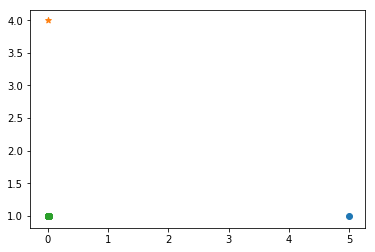

In [16]:
plt.scatter(env_obj.hoop_position[0], env_obj.hoop_position[2], marker="o")
plt.scatter(ancher[0], ancher[2], marker="*")
plt.scatter(locs[:, 0], locs[:, 1])
# plt.plot(locs[:, 0], locs[:, 1])
# print(speeds)

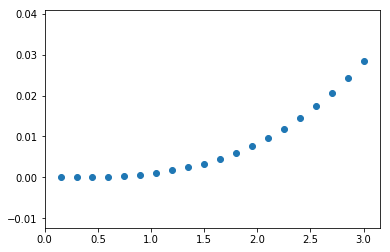

In [17]:
plt.scatter(speeds[:, 0], speeds[:, 1])

### visualization functions

In [10]:
def draw_background():
    scene = canvas(background=color.black, up=vector(-1, -1, 0), height=600, center=vector(0, 0, 0))
    scene.camera.pos = vector(3.5, 3.5, 10)
    scene.camera.axis = vector(-3.5, -3.5, -10)
    
    # plot the axises
    axis_length = 3
    x = arrow(pos=vector(0,0,0), axis=vector(axis_length,0,0), shaftwidth=0.1, color=color.red)
    text(text='x', pos=vector(axis_length,0,0), axis=vector(axis_length,0,0))
    y = arrow(pos=vector(0,0,0), axis=vector(0,axis_length,0), shaftwidth=0.1, color=color.green)
    text(text='y', pos=vector(0,axis_length,0), axis=vector(0,axis_length,0))
    z = arrow(pos=vector(0,0,0), axis=vector(0,0,-axis_length), shaftwidth=0.1, color=color.blue)
    text(text='-z', pos=vector(0,0,-axis_length), axis=vector(0,0,-axis_length))
    return(scene)

def draw_robotics(joint_locs, objects2delete=[]):
    
    # delete the old positions
    for obj in objects2delete:
        obj.visible = False
        del obj 

    # color list
    color_list = [color.cyan, color.yellow, color.magenta, color.orange, vector(0.7, 0.2, 0.1),
                  vector(0.2, 0.1, 0.7), vector(0.7, 0.7, 0.8)]
    
    # draw the links
    curve_list = [[] for _ in xrange(len(joint_locs))] # container to store the objects that make up the robot
    curve_list[0] = curve(pos=[vector(0, 0, 0), vector(*joint_locs[0, :3])], radius=0.5)

    for idx in xrange(1, len(joint_locs), 1):
        p0 = vector(*joint_locs[idx-1, :3])
        p1 = vector(*joint_locs[idx, :3])
        curve_list[idx] = curve(pos=[p0, p1], color=color_list[idx])
        
        
    end_effector = box(pos=vector(*joint_locs[-1, :3]), length=0.7, height=0.2, width=0.3)
    curve_list.append(end_effector)

    return(curve_list)

In [11]:
env_name = "2d"
env_obj = rbl.Env2D()
model_name = env_name + "_working.h5"
q_object = load_model(model_name)
print(env_obj.hoop_size)

4


In [12]:
new_obj = copy.deepcopy(env_obj)
new_obj.hoop_size = 2
print(env_obj.hoop_size, new_obj.hoop_size)

(4, 2)


In [13]:
# link_lengthes = [1, 3, 1, 1, 1, 1, 1]
# initial_angles = [0, 0, 0, 0, -np.pi/4, 0]
# initial_angular_velocities = np.zeros(env_obj.num_joints)

# initial_rm = rbl.Robotic_Manipulator_Naive(link_lengthes, initial_angles, initial_angular_velocities)

In [14]:
ee_trj_list, ee_pos, ee_speed, reward, score = rbl.test_q_function(q_object, 
                                                                   env_obj)

('Successful throw!!!', 0.34476169182121075)
()
('Successful throw!!!', 0.5514298120673452)
()
('Successful throw!!!', 0.81926129854810903)
()
('Successful throw!!!', 0.60792273826094678)
()


In [18]:
success_idx = np.argmax(reward)
ee_pos_success = ee_trj_list[success_idx]

In [21]:
print(ee_speed[success_idx])
print(ee_pos_success)

[ 4.31005245  0.          5.32423661  0.        ]
[array([  1.22464680e-16,   3.00000000e+00,   2.00000000e+00,
         1.00000000e+00]), array([  1.22464680e-16,   3.00000000e+00,   2.00000000e+00,
         1.00000000e+00]), array([ 0.17364818,  3.        ,  2.01519225,  1.        ]), array([ 0.5      ,  3.       ,  2.1339746,  1.       ]), array([ 0.8660254,  3.       ,  2.5      ,  1.       ]), array([ 0.98480775,  3.        ,  3.17364818,  1.        ]), array([ 0.5      ,  3.       ,  3.8660254,  1.       ]), array([-0.5      ,  3.       ,  3.8660254,  1.       ]), array([-0.98480775,  3.        ,  2.82635182,  1.        ]), array([ -1.22464680e-16,   3.00000000e+00,   2.00000000e+00,
         1.00000000e+00]), array([ 1.,  3.,  3.,  1.]), array([-0.17364818,  3.        ,  3.98480775,  1.        ]), array([-0.8660254,  3.       ,  2.5      ,  1.       ]), array([ 0.8660254,  3.       ,  2.5      ,  1.       ]), array([-0.17364818,  3.        ,  3.98480775,  1.        ]), array([-0

## test the ball object

In [ ]:
env_name = "2d"
env_obj = rbl.env_dict[env_name]
tmp_ball = rbl.Ball([0, 3, 2], [2.5, 0, 10], env_obj)
ball_trajectories = tmp_ball.update()

In [ ]:
plt.scatter(ball_trajectories[:, 0], ball_trajectories[:, 2])
plt.scatter(env_obj.hoop_position[0], env_obj.hoop_position[2], marker="*")
plt.show()
print(tmp_ball.min_dist_to_hoop)

In [ ]:
a = ball_trajectories[:, [0, 2]] - env_obj.hoop_position[[0, 2]]
dist = [np.linalg.norm(item, ord=2) for item in a]

In [ ]:
plt.plot(dist)

## test generate trajectory function

In [ ]:
env_name = "2d"
model_name = env_name + ".h5"
data_name = env_name + ".npz"
env_obj = rbl.env_dict[env_name]

# create an initial object
link_lengthes = [1, 3, 1, 1, 1, 1, 1]
initial_angles = [0, 0, 0, 0, -np.pi/4, 0]
initial_angular_velocities = np.zeros(env_obj.num_joints)

initial_rm = rbl.Robotic_Manipulator_Naive(link_lengthes, initial_angles, initial_angular_velocities)

## test the end-effector speed calculation

In [2]:
env_name = "2d"
env_obj = rbl.Env2D()

In [9]:
link_lengthes = [1, 3, 1, 1, 1, 1, 1]
initial_angles = [0, 0, 0, 0, 0, 0]
initial_angular_velocities = [0, 0, 0, 1, 0, 0]
rm = rbl.Robotic_Manipulator_Naive(link_lengthes, initial_angles, initial_angular_velocities)
print(rm.loc_joints())
print(rm.cal_ee_speed())

[[ 0.  0.  1.  1.]
 [ 0.  0.  4.  1.]
 [ 0.  1.  4.  1.]
 [ 0.  2.  4.  1.]
 [ 0.  3.  4.  1.]
 [ 1.  3.  4.  1.]
 [ 2.  3.  4.  1.]]
[-1.00000008  2.00000017  0.          0.        ]


## test movements joint-by-joint

In [ ]:
max_rotation = np.pi / 2
num_steps = 20
rotation_angles = np.concatenate((np.linspace(0, max_rotation, num=num_steps), 
                                np.linspace(max_rotation, 0, num=num_steps),
                                np.linspace(0, -max_rotation, num=num_steps),
                                np.linspace(-max_rotation, 0, num=num_steps)))
num_angles = len(rotation_angles)
# draw initial configuration of the robot
qs = np.zeros(num_rotations)
rm.configure_robots(qs)
draw_background()
objs2delete = draw_robotics(rm.joint_abs_locations)

for idx in xrange(num_rotations):
    for idj in xrange(num_angles):
        rate(20)
        qs[idx] = rotation_angles[idj]
        rm.configure_robots(qs)
        objs2delete = draw_robotics(rm.joint_abs_locations, objs2delete)